## Felix Emmanuel 
### 202122699

In [1]:
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, PrecisionRecallDisplay, precision_score, recall_score,f1_score

In [2]:
#loading the dataset into a dataframe
df = pd.read_csv("Breast_cancer_data.csv")


In [3]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


## Exploratory Data Analysis

In [4]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [5]:
#calling out to inspect presence of null values.
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


## Sumary Statistics

In [7]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


### Key Observations

- Mean value is greater than median value of each column represented by 50%(50th percentile) in index column except for the diagnosis column.
- There is significantly large differnece in 75th %tile and max values "mean_area"
- Thus observations 1 and 2 suggests that there are extreme values-Outliers in our dataset

In [8]:
df.shape

(569, 6)

In [9]:
df.mean_area.unique

<bound method Series.unique of 0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
564    1479.0
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: mean_area, Length: 569, dtype: float64>

In [10]:
df.diagnosis.unique()

array([0, 1], dtype=int64)

# Data Visualization

<AxesSubplot:>

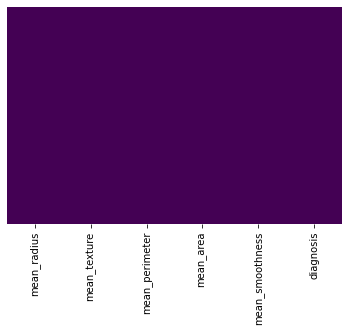

In [11]:
#checking for missing values
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

- Dataset has no missing values.
- If there were any, it would have been noticed in figure represented by different colour shade on purple background.


## Check Correlation

<AxesSubplot:>

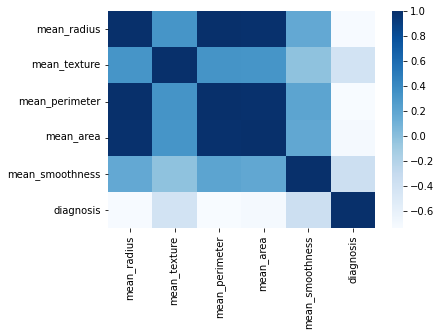

In [12]:
# This checks the correlation between the features 
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 


In [13]:
df_corr=df.corr()

<AxesSubplot:>

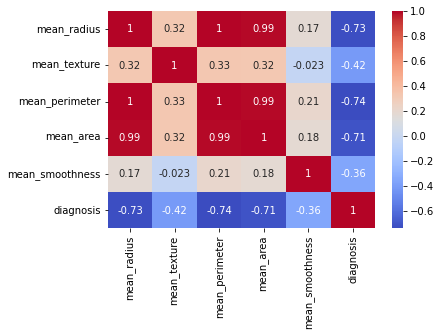

In [14]:
#Quality correlation matrix
sns.heatmap(df_corr,annot=True,cmap='coolwarm')


- There is a strong positive correlation between 'mean_area' and 'mean_radius' and 'mean_perimeter'
- While 'mean_area', 'mean _radius' and 'mean_perimeter' all have strong negative correlation with diagnosis

In [15]:
# Dropping overlapped features
df.drop(['mean_radius','mean_area'],axis=1,inplace=True)

In [16]:
#checking the proportion of the target feature
df.diagnosis.value_counts()/len(df)

1    0.627417
0    0.372583
Name: diagnosis, dtype: float64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

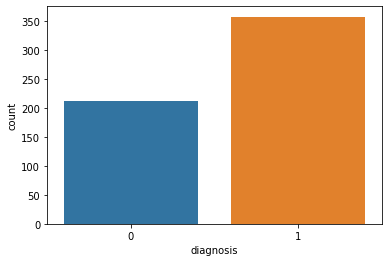

In [17]:
sns.countplot(x=df.diagnosis)

### Dropping Overalpping features

In [18]:
df_2_corr=df.corr()

<AxesSubplot:>

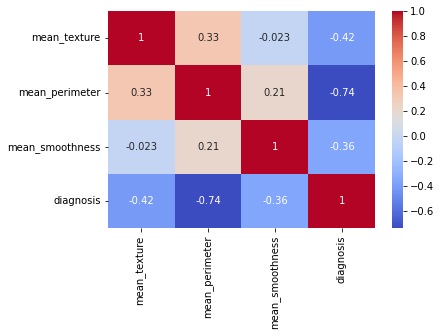

In [19]:
#inspecting heatmap after dropping overlapping features
sns.heatmap(df_2_corr,annot=True,cmap='coolwarm')

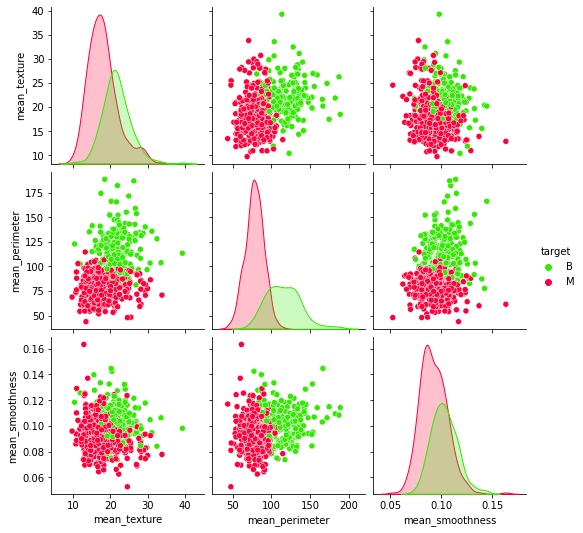

In [20]:
df['target'] = df['diagnosis'].map({0:'B',1:'M'})
sns.pairplot(df.drop('diagnosis', axis = 1), hue='target',palette='prism');

## Spliting the dataset

In [21]:
X = df.drop(['diagnosis','target'],axis=1)
Y = df['diagnosis']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [23]:
x_train

,mean_texture,mean_perimeter,mean_smoothness
338,17.53,64.41,0.10070
427,21.98,68.79,0.08801
406,14.86,104.30,0.09495
96,17.84,77.79,0.10450
490,22.44,78.18,0.08192
...,...,...,...
277,19.98,120.90,0.08923
9,24.04,83.97,0.11860
359,18.32,59.82,0.10090
192,18.22,60.73,0.06950


In [24]:
#standardizing the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(x_train)
y_train=np.array(y_train)
X_test = sc.fit_transform(x_test)
y_test=np.array(y_test)

In [25]:
#Oversampling the target feature by SMOTING
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, Y)

C:\Users\OSHODI IFEDAYO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

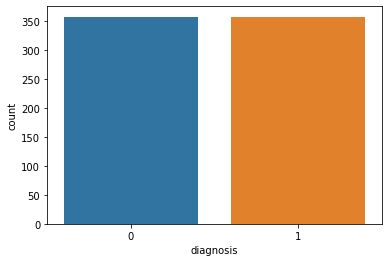

In [26]:
sns.countplot(y_resampled)

## Deep Learning - Feeedforward Neural Network

In [27]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
15/15 [==============================] - 4s 51ms/step - loss: 0.7114 - accuracy: 0.3626 - val_loss: 0.6850 - val_accuracy: 0.4386
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.4505 - val_loss: 0.6783 - val_accuracy: 0.8860
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6816 - accuracy: 0.7077 - val_loss: 0.6741 - val_accuracy: 0.6667
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6731 - accuracy: 0.6505 - val_loss: 0.6703 - val_accuracy: 0.5877
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6661 - accuracy: 0.6396 - val_loss: 0.6653 - val_accuracy: 0.5965
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6588 - accuracy: 0.6396 - val_loss: 0.6591 - val_accuracy: 0.6140
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6484 - val_loss: 0.6491 - val_accuracy: 0.6842
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1676 - accuracy: 0.9385 - val_loss: 0.1651 - val_accuracy: 0.9123
Epoch 60/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1635 - accuracy: 0.9341 - val_loss: 0.1623 - val_accuracy: 0.9035
Epoch 61/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1653 - accuracy: 0.9451 - val_loss: 0.1622 - val_accuracy: 0.9035
Epoch 62/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1639 - accuracy: 0.9429 - val_loss: 0.1619 - val_accuracy: 0.9035
Epoch 63/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1635 - accuracy: 0.9407 - val_loss: 0.1612 - val_accuracy: 0.8947
Epoch 64/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1611 - accuracy: 0.9451 - val_loss: 0.1609 - val_accuracy: 0.9035
Epoch 65/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1618 - accuracy: 0.9407 - val_loss: 0.1604 - val_accuracy: 0.8947
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

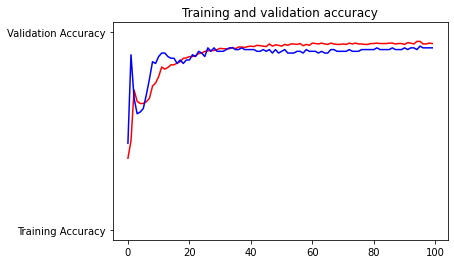

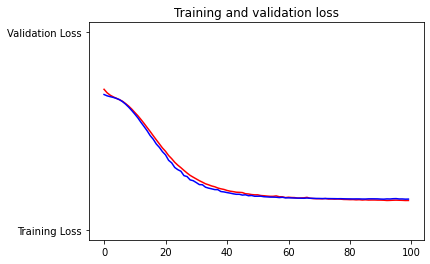

In [30]:
# PLOT LOSS AND ACCURACY
# %matplotlib inline

# import matplotlib.image  as mpimg
# import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [31]:
model_a=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='tanh')
])

In [32]:
model_a.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history_a=model_a.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
15/15 [==============================] - 2s 26ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 60/100
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 61/100
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 62/100
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 63/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 64/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 65/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

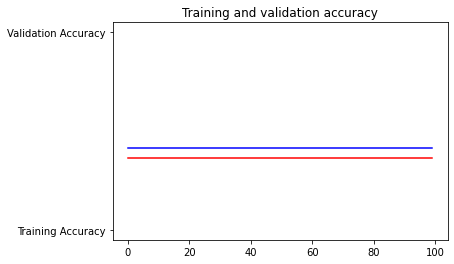

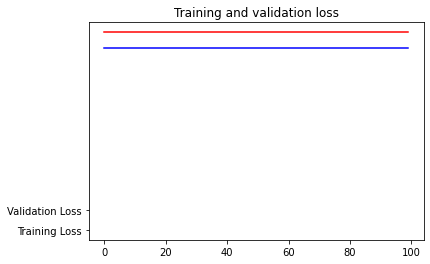

In [34]:
acc=history_a.history['accuracy']
val_acc=history_a.history['val_accuracy']
loss=history_a.history['loss']
val_loss=history_a.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [35]:
model_b=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='tanh')
])

In [36]:
model_b.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
history_b=model_b.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
15/15 [==============================] - 2s 25ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 60/100
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 61/100
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 62/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 63/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 64/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 65/100
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

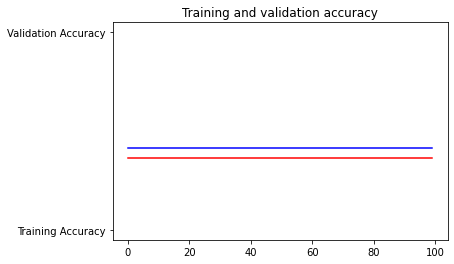

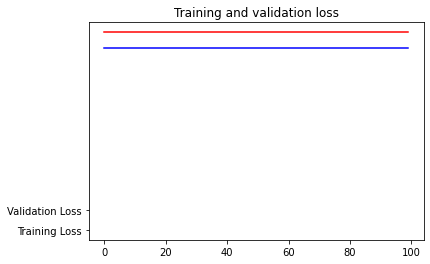

In [38]:

acc=history_b.history['accuracy']
val_acc=history_b.history['val_accuracy']
loss=history_b.history['loss']
val_loss=history_b.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [39]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [40]:
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
history_2=model_2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200)

Epoch 1/200
15/15 [==============================] - 2s 30ms/step - loss: 0.6988 - accuracy: 0.3626 - val_loss: 0.6820 - val_accuracy: 0.5614
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6833 - accuracy: 0.6857 - val_loss: 0.6746 - val_accuracy: 0.7719
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6726 - accuracy: 0.6637 - val_loss: 0.6690 - val_accuracy: 0.6228
Epoch 4/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6650 - accuracy: 0.6440 - val_loss: 0.6624 - val_accuracy: 0.6228
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6583 - accuracy: 0.6505 - val_loss: 0.6537 - val_accuracy: 0.7193
Epoch 6/200
15/15 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6549 - val_loss: 0.6454 - val_accuracy: 0.7193
Epoch 7/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6417 - accuracy: 0.6571 - val_loss: 0.6338 - val_accuracy: 0.7632
Epoch 8/200


15/15 [==============================] - 0s 5ms/step - loss: 0.1783 - accuracy: 0.9253 - val_loss: 0.1708 - val_accuracy: 0.8860
Epoch 59/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1773 - accuracy: 0.9297 - val_loss: 0.1742 - val_accuracy: 0.8947
Epoch 60/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1762 - accuracy: 0.9275 - val_loss: 0.1700 - val_accuracy: 0.8860
Epoch 61/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1756 - accuracy: 0.9341 - val_loss: 0.1733 - val_accuracy: 0.8947
Epoch 62/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1765 - accuracy: 0.9275 - val_loss: 0.1678 - val_accuracy: 0.8947
Epoch 63/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1735 - accuracy: 0.9275 - val_loss: 0.1706 - val_accuracy: 0.8947
Epoch 64/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1733 - accuracy: 0.9209 - val_loss: 0.1668 - val_accuracy: 0.9035
Epoch 65/200
15/15 

Epoch 116/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1551 - accuracy: 0.9407 - val_loss: 0.1567 - val_accuracy: 0.9123
Epoch 117/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1557 - accuracy: 0.9407 - val_loss: 0.1574 - val_accuracy: 0.9211
Epoch 118/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1553 - accuracy: 0.9363 - val_loss: 0.1567 - val_accuracy: 0.9123
Epoch 119/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1556 - accuracy: 0.9407 - val_loss: 0.1565 - val_accuracy: 0.9123
Epoch 120/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1550 - accuracy: 0.9407 - val_loss: 0.1574 - val_accuracy: 0.9211
Epoch 121/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1536 - accuracy: 0.9407 - val_loss: 0.1564 - val_accuracy: 0.9123
Epoch 122/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1547 - accuracy: 0.9363 - val_loss: 0.1562 - val_accuracy: 0.9123

15/15 [==============================] - 0s 6ms/step - loss: 0.1493 - accuracy: 0.9473 - val_loss: 0.1581 - val_accuracy: 0.9298
Epoch 174/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1509 - accuracy: 0.9429 - val_loss: 0.1554 - val_accuracy: 0.9298
Epoch 175/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1507 - accuracy: 0.9473 - val_loss: 0.1549 - val_accuracy: 0.9211
Epoch 176/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1507 - accuracy: 0.9429 - val_loss: 0.1573 - val_accuracy: 0.9298
Epoch 177/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1497 - accuracy: 0.9516 - val_loss: 0.1547 - val_accuracy: 0.9211
Epoch 178/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1485 - accuracy: 0.9516 - val_loss: 0.1565 - val_accuracy: 0.9386
Epoch 179/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1496 - accuracy: 0.9473 - val_loss: 0.1572 - val_accuracy: 0.9298
Epoch 180/200

Text(0.5, 1.0, 'Training and validation loss')

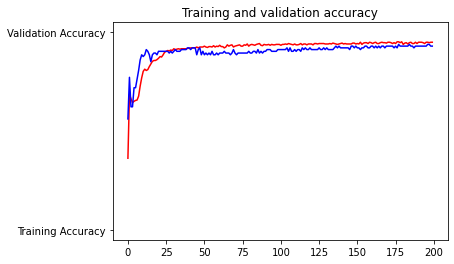

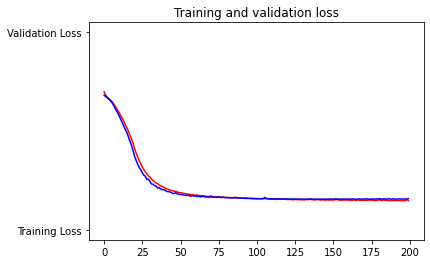

In [42]:
acc=history_2.history['accuracy']
val_acc=history_2.history['val_accuracy']
loss=history_2.history['loss']
val_loss=history_2.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [43]:
model_2a=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [44]:
model_2a.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
history_2a=model_2a.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=102)

Epoch 1/102
15/15 [==============================] - 1s 25ms/step - loss: 0.6894 - accuracy: 0.6374 - val_loss: 0.7012 - val_accuracy: 0.5877
Epoch 2/102
15/15 [==============================] - 0s 6ms/step - loss: 0.6818 - accuracy: 0.6374 - val_loss: 0.6963 - val_accuracy: 0.5877
Epoch 3/102
15/15 [==============================] - 0s 6ms/step - loss: 0.6763 - accuracy: 0.6374 - val_loss: 0.6907 - val_accuracy: 0.5877
Epoch 4/102
15/15 [==============================] - 0s 8ms/step - loss: 0.6716 - accuracy: 0.6374 - val_loss: 0.6846 - val_accuracy: 0.5877
Epoch 5/102
15/15 [==============================] - 0s 6ms/step - loss: 0.6655 - accuracy: 0.6374 - val_loss: 0.6786 - val_accuracy: 0.5877
Epoch 6/102
15/15 [==============================] - 0s 6ms/step - loss: 0.6590 - accuracy: 0.6374 - val_loss: 0.6721 - val_accuracy: 0.5877
Epoch 7/102
15/15 [==============================] - 0s 5ms/step - loss: 0.6522 - accuracy: 0.6374 - val_loss: 0.6637 - val_accuracy: 0.5877
Epoch 8/102


15/15 [==============================] - 0s 8ms/step - loss: 0.1785 - accuracy: 0.9341 - val_loss: 0.1744 - val_accuracy: 0.9035
Epoch 59/102
15/15 [==============================] - 0s 10ms/step - loss: 0.1771 - accuracy: 0.9319 - val_loss: 0.1809 - val_accuracy: 0.9211
Epoch 60/102
15/15 [==============================] - 0s 9ms/step - loss: 0.1752 - accuracy: 0.9385 - val_loss: 0.1745 - val_accuracy: 0.9035
Epoch 61/102
15/15 [==============================] - 0s 9ms/step - loss: 0.1742 - accuracy: 0.9385 - val_loss: 0.1755 - val_accuracy: 0.9035
Epoch 62/102
15/15 [==============================] - 0s 6ms/step - loss: 0.1732 - accuracy: 0.9385 - val_loss: 0.1731 - val_accuracy: 0.9035
Epoch 63/102
15/15 [==============================] - 0s 6ms/step - loss: 0.1721 - accuracy: 0.9341 - val_loss: 0.1707 - val_accuracy: 0.9123
Epoch 64/102
15/15 [==============================] - 0s 6ms/step - loss: 0.1702 - accuracy: 0.9407 - val_loss: 0.1736 - val_accuracy: 0.9035
Epoch 65/102
15/15

Text(0.5, 1.0, 'Training and validation loss')

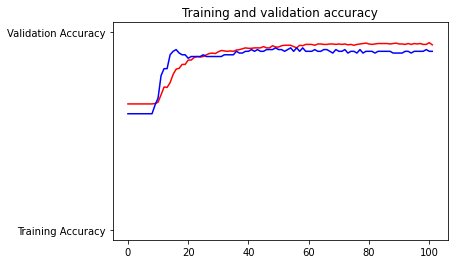

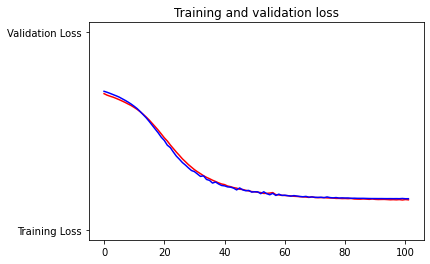

In [46]:
acc=history_2a.history['accuracy']
val_acc=history_2a.history['val_accuracy']
loss=history_2a.history['loss']
val_loss=history_2a.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [47]:
model_2c=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='softmax'),
    tf.keras.layers.Dense(20,activation='tanh'),
    tf.keras.layers.Dense(1,activation='relu')
])

In [48]:
model_2c.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
history_2c=model_2c.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200)

Epoch 1/200
15/15 [==============================] - 1s 25ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 2/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 3/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 4/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 5/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 8/200


Epoch 59/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 60/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 61/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 62/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 63/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 64/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 65/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 

15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 117/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 118/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 119/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 120/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 121/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 122/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 123/200

15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 174/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 175/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 176/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 177/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 178/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 179/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 180/200

Text(0.5, 1.0, 'Training and validation loss')

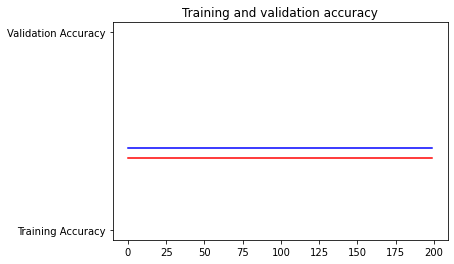

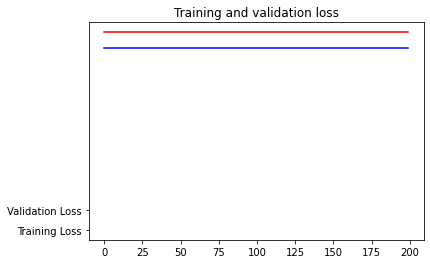

In [50]:
acc=history_2c.history['accuracy']
val_acc=history_2c.history['val_accuracy']
loss=history_2c.history['loss']
val_loss=history_2c.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [51]:
model_2d=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='softmax'),
    tf.keras.layers.Dense(20,activation='tanh'),
    tf.keras.layers.Dense(1,activation='relu')
])

In [52]:
model_2d.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
history_2d=model_2d.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200)

Epoch 1/200
15/15 [==============================] - 2s 26ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 4/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 8/200


Epoch 59/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 60/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 61/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 62/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 63/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 64/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 65/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 

15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 117/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 118/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 119/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 120/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 121/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 122/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 123/200

15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 174/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 175/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 176/200
15/15 [==============================] - 0s 5ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 177/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 178/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 179/200
15/15 [==============================] - 0s 6ms/step - loss: 9.8313 - accuracy: 0.3626 - val_loss: 9.0655 - val_accuracy: 0.4123
Epoch 180/200

Text(0.5, 1.0, 'Training and validation loss')

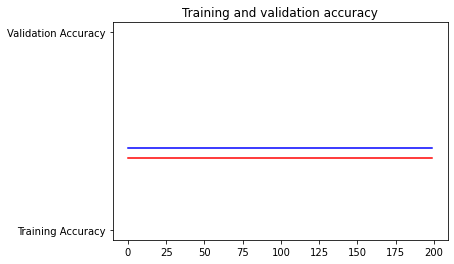

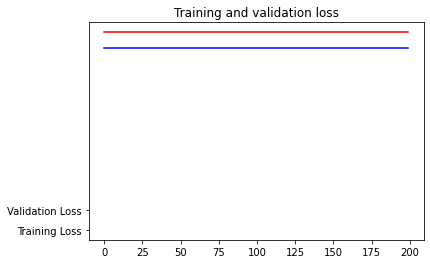

In [54]:
acc=history_2d.history['accuracy']
val_acc=history_2d.history['val_accuracy']
loss=history_2d.history['loss']
val_loss=history_2d.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [55]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1,activation='tanh')
])

In [56]:
model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
history_3=model_3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300)

Epoch 1/300
15/15 [==============================] - 1s 26ms/step - loss: 1.9638 - accuracy: 0.3626 - val_loss: 1.3874 - val_accuracy: 0.4123
Epoch 2/300
15/15 [==============================] - 0s 6ms/step - loss: 1.2257 - accuracy: 0.3626 - val_loss: 1.0914 - val_accuracy: 0.4123
Epoch 3/300
15/15 [==============================] - 0s 8ms/step - loss: 1.0251 - accuracy: 0.3582 - val_loss: 0.9974 - val_accuracy: 0.3947
Epoch 4/300
15/15 [==============================] - 0s 5ms/step - loss: 0.9529 - accuracy: 0.3297 - val_loss: 0.9402 - val_accuracy: 0.2807
Epoch 5/300
15/15 [==============================] - 0s 6ms/step - loss: 0.8986 - accuracy: 0.2440 - val_loss: 0.9016 - val_accuracy: 0.1930
Epoch 6/300
15/15 [==============================] - 0s 5ms/step - loss: 0.8573 - accuracy: 0.1648 - val_loss: 0.8785 - val_accuracy: 0.1316
Epoch 7/300
15/15 [==============================] - 0s 5ms/step - loss: 0.8314 - accuracy: 0.1912 - val_loss: 0.8628 - val_accuracy: 0.1579
Epoch 8/300


Epoch 59/300
15/15 [==============================] - 0s 5ms/step - loss: 0.2675 - accuracy: 0.9077 - val_loss: 0.3763 - val_accuracy: 0.8947
Epoch 60/300
15/15 [==============================] - 0s 5ms/step - loss: 0.2614 - accuracy: 0.9055 - val_loss: 0.3632 - val_accuracy: 0.9035
Epoch 61/300
15/15 [==============================] - 0s 5ms/step - loss: 0.2588 - accuracy: 0.9055 - val_loss: 0.3600 - val_accuracy: 0.9035
Epoch 62/300
15/15 [==============================] - 0s 5ms/step - loss: 0.2549 - accuracy: 0.9033 - val_loss: 0.3623 - val_accuracy: 0.8860
Epoch 63/300
15/15 [==============================] - 0s 5ms/step - loss: 0.2514 - accuracy: 0.9011 - val_loss: 0.3564 - val_accuracy: 0.9035
Epoch 64/300
15/15 [==============================] - 0s 5ms/step - loss: 0.2475 - accuracy: 0.9077 - val_loss: 0.3554 - val_accuracy: 0.9035
Epoch 65/300
15/15 [==============================] - 0s 6ms/step - loss: 0.2444 - accuracy: 0.9099 - val_loss: 0.3557 - val_accuracy: 0.8947
Epoch 

15/15 [==============================] - 0s 6ms/step - loss: 0.1733 - accuracy: 0.9253 - val_loss: 0.1607 - val_accuracy: 0.9035
Epoch 117/300
15/15 [==============================] - 0s 6ms/step - loss: 0.1721 - accuracy: 0.9319 - val_loss: 0.1606 - val_accuracy: 0.9035
Epoch 118/300
15/15 [==============================] - 0s 6ms/step - loss: 0.1697 - accuracy: 0.9253 - val_loss: 0.1589 - val_accuracy: 0.9123
Epoch 119/300
15/15 [==============================] - 0s 6ms/step - loss: 0.1702 - accuracy: 0.9253 - val_loss: 0.1593 - val_accuracy: 0.9035
Epoch 120/300
15/15 [==============================] - 0s 5ms/step - loss: 0.1700 - accuracy: 0.9319 - val_loss: 0.1592 - val_accuracy: 0.9035
Epoch 121/300
15/15 [==============================] - 0s 5ms/step - loss: 0.1693 - accuracy: 0.9275 - val_loss: 0.1590 - val_accuracy: 0.9035
Epoch 122/300
15/15 [==============================] - 0s 6ms/step - loss: 0.1682 - accuracy: 0.9297 - val_loss: 0.1588 - val_accuracy: 0.9035
Epoch 123/300

15/15 [==============================] - 0s 5ms/step - loss: 0.1628 - accuracy: 0.9297 - val_loss: 0.1532 - val_accuracy: 0.9211
Epoch 174/300
15/15 [==============================] - 0s 5ms/step - loss: 0.1653 - accuracy: 0.9363 - val_loss: 0.1864 - val_accuracy: 0.9123
Epoch 175/300
15/15 [==============================] - 0s 6ms/step - loss: 0.2874 - accuracy: 0.8637 - val_loss: 0.2724 - val_accuracy: 0.8684
Epoch 176/300
15/15 [==============================] - 0s 6ms/step - loss: 0.2662 - accuracy: 0.8703 - val_loss: 0.1876 - val_accuracy: 0.9211
Epoch 177/300
15/15 [==============================] - 0s 6ms/step - loss: 0.1813 - accuracy: 0.9165 - val_loss: 0.1541 - val_accuracy: 0.9298
Epoch 178/300
15/15 [==============================] - 0s 6ms/step - loss: 0.1605 - accuracy: 0.9319 - val_loss: 0.1547 - val_accuracy: 0.9123
Epoch 179/300
15/15 [==============================] - 0s 6ms/step - loss: 0.1640 - accuracy: 0.9319 - val_loss: 0.1535 - val_accuracy: 0.9298
Epoch 180/300

15/15 [==============================] - 0s 6ms/step - loss: 0.1734 - accuracy: 0.9187 - val_loss: 0.1596 - val_accuracy: 0.9386
Epoch 231/300
15/15 [==============================] - 0s 5ms/step - loss: 0.1624 - accuracy: 0.9253 - val_loss: 0.1533 - val_accuracy: 0.9211
Epoch 232/300
15/15 [==============================] - 0s 6ms/step - loss: 0.1647 - accuracy: 0.9253 - val_loss: 0.1593 - val_accuracy: 0.9386
Epoch 233/300
15/15 [==============================] - 0s 5ms/step - loss: 0.1697 - accuracy: 0.9165 - val_loss: 0.1578 - val_accuracy: 0.9386
Epoch 234/300
15/15 [==============================] - 0s 5ms/step - loss: 0.1613 - accuracy: 0.9275 - val_loss: 0.1531 - val_accuracy: 0.9211
Epoch 235/300
15/15 [==============================] - 0s 5ms/step - loss: 0.1628 - accuracy: 0.9363 - val_loss: 0.1532 - val_accuracy: 0.9211
Epoch 236/300
15/15 [==============================] - 0s 6ms/step - loss: 0.1615 - accuracy: 0.9209 - val_loss: 0.1557 - val_accuracy: 0.9298
Epoch 237/300

15/15 [==============================] - 0s 6ms/step - loss: 0.3265 - accuracy: 0.8527 - val_loss: 0.2648 - val_accuracy: 0.8860
Epoch 288/300
15/15 [==============================] - 0s 8ms/step - loss: 0.2848 - accuracy: 0.8593 - val_loss: 0.2365 - val_accuracy: 0.8860
Epoch 289/300
15/15 [==============================] - 0s 6ms/step - loss: 0.2555 - accuracy: 0.8769 - val_loss: 0.2152 - val_accuracy: 0.8947
Epoch 290/300
15/15 [==============================] - 0s 6ms/step - loss: 0.2313 - accuracy: 0.8901 - val_loss: 0.1995 - val_accuracy: 0.9123
Epoch 291/300
15/15 [==============================] - 0s 5ms/step - loss: 0.2132 - accuracy: 0.9055 - val_loss: 0.1867 - val_accuracy: 0.9211
Epoch 292/300
15/15 [==============================] - 0s 6ms/step - loss: 0.1983 - accuracy: 0.9099 - val_loss: 0.1768 - val_accuracy: 0.9211
Epoch 293/300
15/15 [==============================] - 0s 5ms/step - loss: 0.1870 - accuracy: 0.9165 - val_loss: 0.1696 - val_accuracy: 0.9298
Epoch 294/300

Text(0.5, 1.0, 'Training and validation loss')

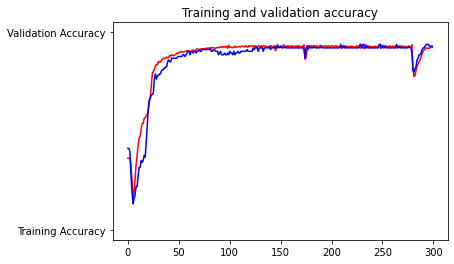

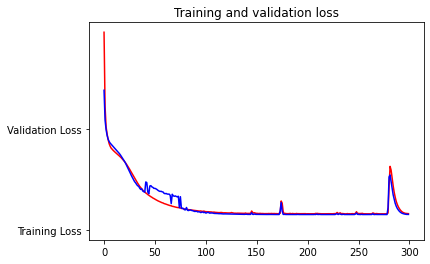

In [58]:
acc=history_3.history['accuracy']
val_acc=history_3.history['val_accuracy']
loss=history_3.history['loss']
val_loss=history_3.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [59]:
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [60]:
model_4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
history_4=model_4.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=400)

Epoch 1/400
15/15 [==============================] - 2s 45ms/step - loss: 0.6918 - accuracy: 0.6132 - val_loss: 0.6923 - val_accuracy: 0.5877
Epoch 2/400
15/15 [==============================] - 0s 6ms/step - loss: 0.6830 - accuracy: 0.6374 - val_loss: 0.6856 - val_accuracy: 0.5877
Epoch 3/400
15/15 [==============================] - 0s 5ms/step - loss: 0.6748 - accuracy: 0.6374 - val_loss: 0.6785 - val_accuracy: 0.5877
Epoch 4/400
15/15 [==============================] - 0s 5ms/step - loss: 0.6663 - accuracy: 0.6374 - val_loss: 0.6702 - val_accuracy: 0.5877
Epoch 5/400
15/15 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.6374 - val_loss: 0.6605 - val_accuracy: 0.5965
Epoch 6/400
15/15 [==============================] - 0s 6ms/step - loss: 0.6465 - accuracy: 0.6484 - val_loss: 0.6495 - val_accuracy: 0.6053
Epoch 7/400
15/15 [==============================] - 0s 6ms/step - loss: 0.6359 - accuracy: 0.6527 - val_loss: 0.6377 - val_accuracy: 0.6404
Epoch 8/400


15/15 [==============================] - 0s 5ms/step - loss: 0.1785 - accuracy: 0.9385 - val_loss: 0.1742 - val_accuracy: 0.9035
Epoch 59/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1771 - accuracy: 0.9363 - val_loss: 0.1738 - val_accuracy: 0.9123
Epoch 60/400
15/15 [==============================] - 0s 6ms/step - loss: 0.1761 - accuracy: 0.9363 - val_loss: 0.1712 - val_accuracy: 0.8947
Epoch 61/400
15/15 [==============================] - 0s 6ms/step - loss: 0.1747 - accuracy: 0.9341 - val_loss: 0.1718 - val_accuracy: 0.9123
Epoch 62/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1751 - accuracy: 0.9341 - val_loss: 0.1717 - val_accuracy: 0.9123
Epoch 63/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1753 - accuracy: 0.9319 - val_loss: 0.1685 - val_accuracy: 0.8947
Epoch 64/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1703 - accuracy: 0.9385 - val_loss: 0.1700 - val_accuracy: 0.9123
Epoch 65/400
15/15 

Epoch 116/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1468 - accuracy: 0.9429 - val_loss: 0.1649 - val_accuracy: 0.9474
Epoch 117/400
15/15 [==============================] - 0s 6ms/step - loss: 0.1469 - accuracy: 0.9451 - val_loss: 0.1654 - val_accuracy: 0.9386
Epoch 118/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1468 - accuracy: 0.9407 - val_loss: 0.1678 - val_accuracy: 0.9211
Epoch 119/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1477 - accuracy: 0.9451 - val_loss: 0.1635 - val_accuracy: 0.9474
Epoch 120/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1470 - accuracy: 0.9429 - val_loss: 0.1685 - val_accuracy: 0.9211
Epoch 121/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1461 - accuracy: 0.9451 - val_loss: 0.1644 - val_accuracy: 0.9474
Epoch 122/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1458 - accuracy: 0.9451 - val_loss: 0.1661 - val_accuracy: 0.9298

15/15 [==============================] - 0s 6ms/step - loss: 0.1415 - accuracy: 0.9407 - val_loss: 0.1741 - val_accuracy: 0.9211
Epoch 174/400
15/15 [==============================] - 0s 6ms/step - loss: 0.1399 - accuracy: 0.9429 - val_loss: 0.1694 - val_accuracy: 0.9386
Epoch 175/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1422 - accuracy: 0.9451 - val_loss: 0.1717 - val_accuracy: 0.9386
Epoch 176/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1426 - accuracy: 0.9451 - val_loss: 0.1701 - val_accuracy: 0.9386
Epoch 177/400
15/15 [==============================] - 0s 7ms/step - loss: 0.1397 - accuracy: 0.9429 - val_loss: 0.1764 - val_accuracy: 0.9211
Epoch 178/400
15/15 [==============================] - 0s 6ms/step - loss: 0.1428 - accuracy: 0.9429 - val_loss: 0.1798 - val_accuracy: 0.9211
Epoch 179/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1435 - accuracy: 0.9429 - val_loss: 0.1706 - val_accuracy: 0.9386
Epoch 180/400

15/15 [==============================] - 0s 5ms/step - loss: 0.1394 - accuracy: 0.9429 - val_loss: 0.1784 - val_accuracy: 0.9211
Epoch 231/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1396 - accuracy: 0.9407 - val_loss: 0.1769 - val_accuracy: 0.9298
Epoch 232/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1401 - accuracy: 0.9407 - val_loss: 0.1816 - val_accuracy: 0.9211
Epoch 233/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1443 - accuracy: 0.9429 - val_loss: 0.1718 - val_accuracy: 0.9386
Epoch 234/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1405 - accuracy: 0.9451 - val_loss: 0.1850 - val_accuracy: 0.9211
Epoch 235/400
15/15 [==============================] - 0s 6ms/step - loss: 0.1389 - accuracy: 0.9429 - val_loss: 0.1795 - val_accuracy: 0.9298
Epoch 236/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1425 - accuracy: 0.9451 - val_loss: 0.1760 - val_accuracy: 0.9298
Epoch 237/400

15/15 [==============================] - 0s 5ms/step - loss: 0.1376 - accuracy: 0.9451 - val_loss: 0.1808 - val_accuracy: 0.9298
Epoch 288/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1431 - accuracy: 0.9429 - val_loss: 0.1806 - val_accuracy: 0.9298
Epoch 289/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1402 - accuracy: 0.9451 - val_loss: 0.1893 - val_accuracy: 0.9211
Epoch 290/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1377 - accuracy: 0.9429 - val_loss: 0.1799 - val_accuracy: 0.9298
Epoch 291/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1398 - accuracy: 0.9407 - val_loss: 0.1815 - val_accuracy: 0.9298
Epoch 292/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1389 - accuracy: 0.9407 - val_loss: 0.1850 - val_accuracy: 0.9211
Epoch 293/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1382 - accuracy: 0.9407 - val_loss: 0.1861 - val_accuracy: 0.9211
Epoch 294/400

15/15 [==============================] - 0s 7ms/step - loss: 0.1396 - accuracy: 0.9429 - val_loss: 0.1915 - val_accuracy: 0.9211
Epoch 345/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1386 - accuracy: 0.9451 - val_loss: 0.1841 - val_accuracy: 0.9298
Epoch 346/400
15/15 [==============================] - 0s 6ms/step - loss: 0.1405 - accuracy: 0.9407 - val_loss: 0.1922 - val_accuracy: 0.9211
Epoch 347/400
15/15 [==============================] - 0s 6ms/step - loss: 0.1382 - accuracy: 0.9429 - val_loss: 0.1813 - val_accuracy: 0.9298
Epoch 348/400
15/15 [==============================] - 0s 7ms/step - loss: 0.1385 - accuracy: 0.9451 - val_loss: 0.1900 - val_accuracy: 0.9211
Epoch 349/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1378 - accuracy: 0.9385 - val_loss: 0.1930 - val_accuracy: 0.9211
Epoch 350/400
15/15 [==============================] - 0s 5ms/step - loss: 0.1385 - accuracy: 0.9429 - val_loss: 0.1904 - val_accuracy: 0.9211
Epoch 351/400

Text(0.5, 1.0, 'Training and validation loss')

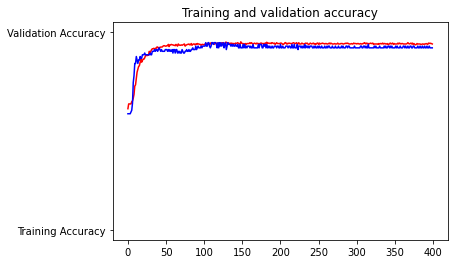

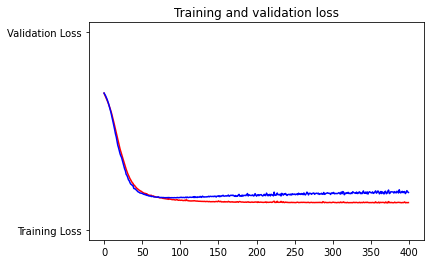

In [62]:
acc=history_4.history['accuracy']
val_acc=history_4.history['val_accuracy']
loss=history_4.history['loss']
val_loss=history_4.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Machine Learning

## Random Forest

In [63]:
#importing the classifier
from sklearn.ensemble import RandomForestClassifier

In [64]:
#setting hyperparameters
forest_model_test = RandomForestClassifier(max_depth=50,random_state=42)
forest_model_test.fit(X_train,y_train)
Y_random_model_test =forest_model_test.predict(X_test)

In [65]:
#conducting  the gridsearch
forest_param = {'n_estimators':[300,400,500,700,800,1000],'max_depth':[5,10,20,40,70,80]}
forest_Gridsearch = GridSearchCV(estimator=forest_model_test,param_grid=forest_param,cv=10,scoring='f1',n_jobs=-1)
forest_Gridsearch.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=50, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 40, 70, 80],
                         'n_estimators': [300, 400, 500, 700, 800, 1000]},
             scoring='f1')

In [66]:
forest_Gridsearch.best_params_

{'max_depth': 5, 'n_estimators': 300}

In [67]:
forest_model_best= RandomForestClassifier(n_estimators=300,max_depth=5)

In [68]:
#fitting the model
forest_model_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=300)

In [69]:
y_random_model =forest_model_best.predict(X_test)

In [70]:
forest_confusion = confusion_matrix(y_random_model,y_test)

In [71]:
#computing the confusion Matrix
forest_confusion

array([[44,  6],
       [ 3, 61]], dtype=int64)

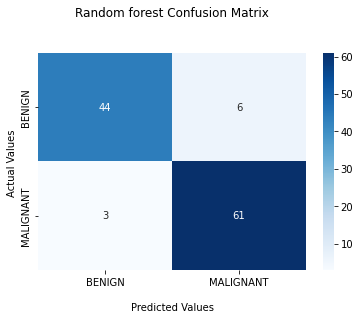

In [72]:
ax = sns.heatmap(forest_confusion, annot=True, cmap='Blues')

ax.set_title('Random forest Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List  in alphabetical order
ax.xaxis.set_ticklabels(['BENIGN','MALIGNANT'])
ax.yaxis.set_ticklabels(['BENIGN','MALIGNANT'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [73]:
forest_model_best.score(X_test,y_test)

0.9210526315789473

In [74]:
precision_score(y_test,y_random_model)

0.953125

In [75]:
recall_score(y_test,y_random_model)

0.9104477611940298

In [76]:
False_negetive_rate_Forest = forest_confusion[1][0]/(forest_confusion[1][0]+forest_confusion[1][1])

In [77]:
False_negetive_rate_Forest*100

4.6875

## Decision Tree

In [78]:
#importing the classifier from the library
from sklearn.tree import DecisionTreeClassifier

In [79]:
#setting the hyperparameters
Tree_model_test = DecisionTreeClassifier(max_depth = 10)
Tree_model_test.fit(X_train,y_train)
y_tree_test = Tree_model_test.predict(X_test)

In [80]:
#computing the confusion matrix
confusion_matrix(y_test,y_tree_test)

array([[42,  5],
       [ 9, 58]], dtype=int64)

In [81]:
# Using grid search to find the best hyperparameters
Tree_param = {'max_depth':[80,50,70,45,20,10],'min_samples_split':[2,4,8,10],'min_samples_leaf':[2,4,8,10]}
Tree_search = GridSearchCV(estimator=Tree_model_test,cv=10,scoring='f1',n_jobs=-1,param_grid=Tree_param)

In [82]:
Tree_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=10), n_jobs=-1,
             param_grid={'max_depth': [80, 50, 70, 45, 20, 10],
                         'min_samples_leaf': [2, 4, 8, 10],
                         'min_samples_split': [2, 4, 8, 10]},
             scoring='f1')

In [83]:
Tree_search.best_params_

{'max_depth': 80, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [84]:
Tree_model = RandomForestClassifier(max_depth=80,min_samples_leaf=4,min_samples_split=10)

In [85]:
Tree_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=4, min_samples_split=10)

In [86]:
y_tree= Tree_model.predict(X_test)

In [87]:
Tree_model.score(X_test,y_test)

0.8947368421052632

In [88]:
Tree_confusion = confusion_matrix(y_test,y_tree)

In [89]:
Tree_confusion

array([[44,  3],
       [ 9, 58]], dtype=int64)

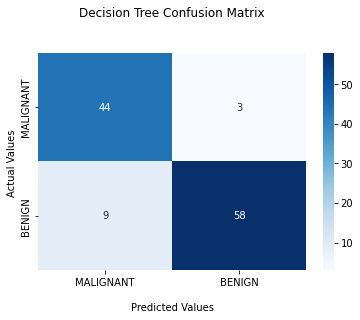

In [90]:
ax = sns.heatmap(Tree_confusion, annot=True, cmap='Blues')

ax.set_title('Decision Tree Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List in alphabetical order
ax.xaxis.set_ticklabels(['MALIGNANT','BENIGN'])
ax.yaxis.set_ticklabels(['MALIGNANT','BENIGN'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [91]:
accuracy_score(y_test,y_tree)

0.8947368421052632

In [92]:
precision_score(y_test,y_tree)

0.9508196721311475

In [93]:
recall_score(y_test,y_tree)

0.8656716417910447

In [94]:
False_negetive_rate_Tree = Tree_confusion[1][0]/(Tree_confusion[1][0]+Tree_confusion[1][1])

In [95]:
False_negetive_rate_Tree*100

13.432835820895523

## SVM

In [96]:
from sklearn.svm import SVC

In [97]:
# An instance of the model

#  the right way to tell a C value or the kernel to use

SVM_model = SVC(C=50, kernel='linear')

#fit the model
SVM_model.fit(X_train,y_train)

SVC(C=50, kernel='linear')

In [98]:
Y_SVM = SVM_model.predict(X_test)

In [99]:
#confusion matrix
SVM_CM = confusion_matrix(y_test,Y_SVM)
SVM_CM

array([[41,  6],
       [ 2, 65]], dtype=int64)

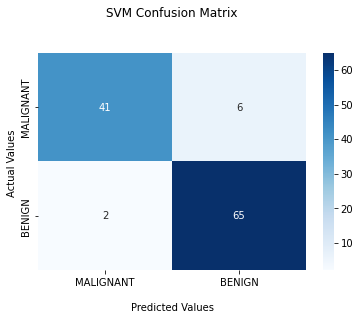

In [100]:
ax = sns.heatmap(SVM_CM, annot=True, cmap='Blues')

ax.set_title('SVM Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List in alphabetical order
ax.xaxis.set_ticklabels(['MALIGNANT','BENIGN'])
ax.yaxis.set_ticklabels(['MALIGNANT','BENIGN'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [101]:
accuracy_score(y_test,Y_SVM)

0.9298245614035088

In [102]:
recall_score(y_test,Y_SVM)

0.9701492537313433

In [103]:
precision_score(y_test,Y_SVM)

0.9154929577464789

In [104]:
# now using a grid search CV
SVM_param = [{"C":[1,10,100,1000],'kernel':['linear']},{"C":[1,10,100,1000],'kernel':['rbf','sigmoid'],'gamma':[0.1,1,10]}]
grid_SVM = GridSearchCV(estimator=SVM_model, param_grid=SVM_param,cv=10,scoring="f1", n_jobs=-1)

In [105]:
grid_SVM.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(C=50, kernel='linear'), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.1, 1, 10],
                          'kernel': ['rbf', 'sigmoid']}],
             scoring='f1')

In [106]:
grid_SVM.best_score_

0.9562814421765312

In [107]:
# The best C value and the best kernel to use
grid_SVM.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [108]:
SVM_model_best = SVC(C=100,kernel='rbf',gamma=0.1)

In [109]:
SVM_model_best.fit(X_train,y_train)

SVC(C=100, gamma=0.1)

In [110]:
Y_SVM_best = SVM_model_best.predict(X_test)

In [111]:
SVM_CM= confusion_matrix(y_test,Y_SVM_best)

In [112]:
accuracy_score(y_test,Y_SVM_best)

0.9298245614035088

In [113]:
recall_score(y_test,Y_SVM_best)

0.9701492537313433

In [114]:
precision_score(y_test,Y_SVM_best)

0.9154929577464789

In [115]:
False_negetive_rate = SVM_CM[1][0]/(SVM_CM[1][0]+SVM_CM[1][1])

In [116]:
False_negetive_rate*100

2.9850746268656714

In [117]:
#Ref
# https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15#:~:text=Exploratory%20Data%20Analysis%20refers%20to,summary%20statistics%20and%20graphical%20representations.
